# Matplotlib and Seaborn 簡介

Seaborn是基於matplotlib的Python可視化庫。它提供了一個高級界面來繪製有吸引力的統計圖形。Seaborn其實是在matplotlib的基礎上進行了更高級的API封裝，從而使得作圖更加容易，不需要經過大量的調整就能使你的圖變得精緻。<b>但應強調的是，應該把Seaborn視為matplotlib的補充，而不是替代物。</b>

Seaborn其實是在matplotlib的基礎上進行了更高級的API封裝，從而使得作圖更加容易，在大多數情況下使用seaborn就能做出很具有吸引力的圖。

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#初始化
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [14, 6] #圖片大小

In [2]:
#df = pd.read_csv('pokemon.csv')
df = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
df.head(8)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False


## 為何圖形重要

In [3]:
df['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [4]:
df['Attack']

0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64

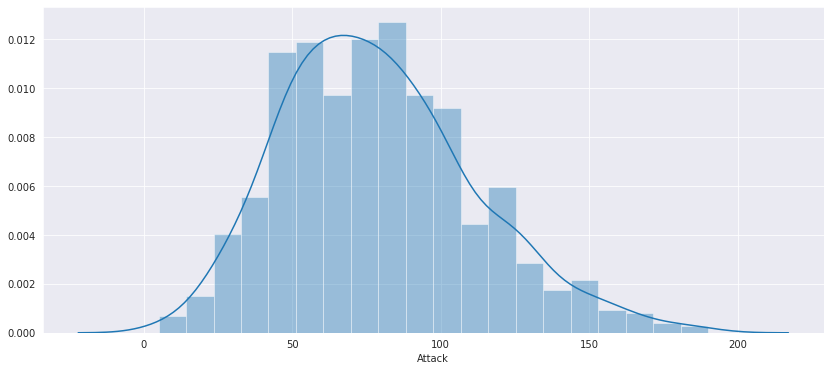

In [5]:
sns.distplot(df['Attack'])
plt.show()

### 小練習: 請畫出神獸的攻擊力分布圖

In [6]:
df['Attack'][df['Legendary']==True]

156     85
157     90
158    100
162    110
163    190
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 65, dtype: int64

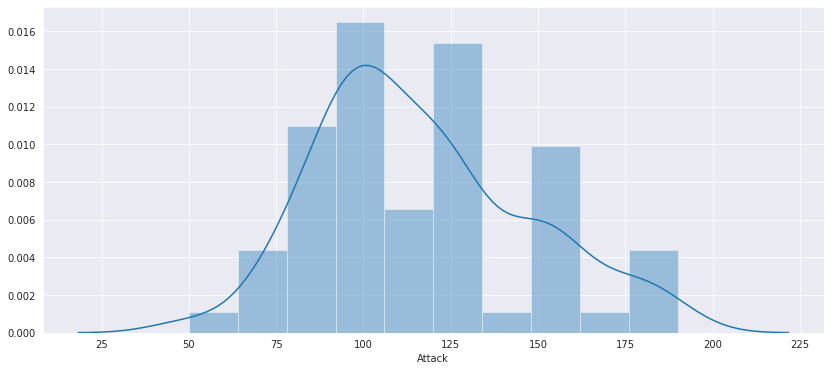

In [8]:
sns.distplot(df['Attack'][df['Legendary']==True])
plt.show()

### 討論不同屬性寶可夢的攻擊力

In [9]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [11]:
df.groupby('Type 1').mean().iloc[:,3]

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

In [12]:
df1 = df.groupby('Type 1').mean().iloc[ : , 3 : 4 ]
df1

,Attack
Type 1,
Bug,70.971014
Dark,88.387097
Dragon,112.125000
Electric,69.090909
Fairy,61.529412
Fighting,96.777778
Fire,84.769231
Flying,78.750000
Ghost,73.781250


In [13]:
df1.index

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object', name='Type 1')

In [14]:
df1['Attack']

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

In [15]:
df.index

RangeIndex(start=0, stop=800, step=1)

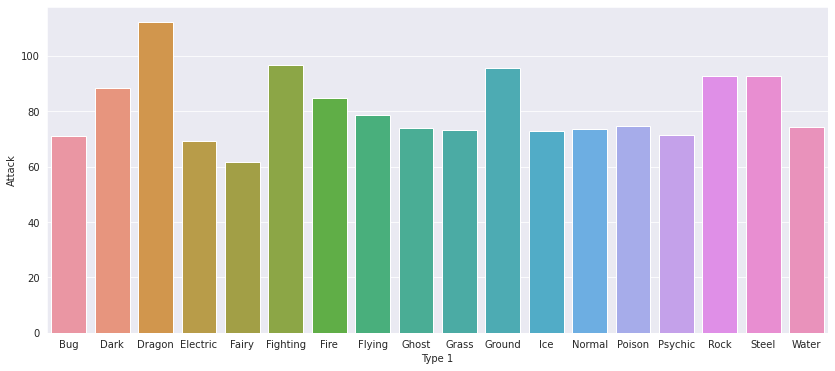

In [16]:
sns.barplot(x=df1.index ,y=df1['Attack'])
plt.show()

In [17]:
df.groupby('Type 1').mean().iloc[ : , 3 : 4].T # T 是用來轉置 Transpose

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Attack,70.971014,88.387097,112.125,69.090909,61.529412,96.777778,84.769231,78.75,73.78125,73.214286,95.75,72.75,73.469388,74.678571,71.45614,92.863636,92.703704,74.151786


In [18]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


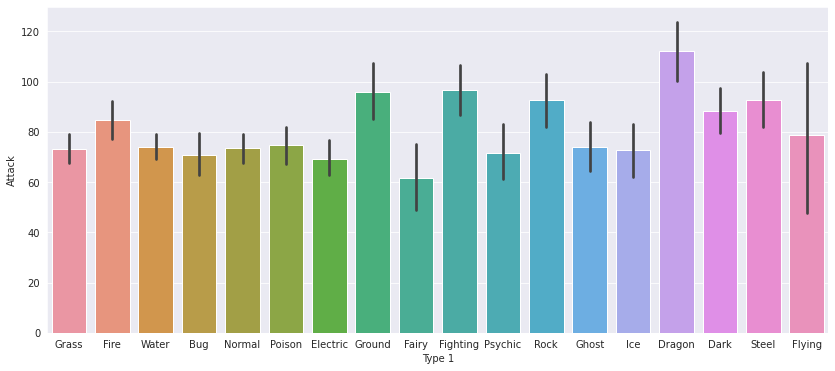

In [19]:
sns.barplot(x="Type 1",y="Attack",data=df)
plt.show()

#黑線為信賴區間長度

In [20]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


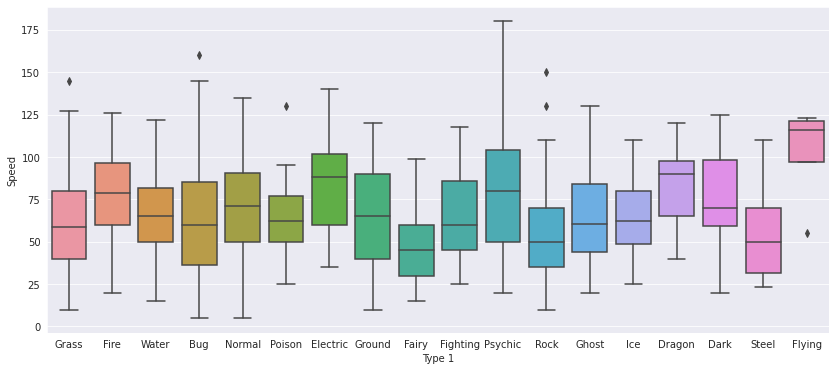

In [21]:
sns.boxplot(x="Type 1",y="Speed",data=df)
plt.show()

#### 補充:如何讓groupby表格跟圖順序一致-用groupby資料重新畫圖

In [22]:
res = df.groupby('Type 1').mean().T# T 是用來轉置 Transpose
res

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,334.492754,461.354839,474.37500,363.500000,449.529412,363.851852,327.403846,677.75,486.50000,344.871429,356.28125,423.541667,319.173469,251.785714,380.807018,392.727273,442.851852,303.089286
Total,378.927536,445.741935,550.53125,443.409091,413.176471,416.444444,458.076923,485.00,439.56250,421.142857,437.50000,433.458333,401.683673,399.142857,475.947368,453.750000,487.703704,430.455357
HP,56.884058,66.806452,83.31250,59.795455,74.117647,69.851852,69.903846,70.75,64.43750,67.271429,73.78125,72.000000,77.275510,67.250000,70.631579,65.363636,65.222222,72.062500
Attack,70.971014,88.387097,112.12500,69.090909,61.529412,96.777778,84.769231,78.75,73.78125,73.214286,95.75000,72.750000,73.469388,74.678571,71.456140,92.863636,92.703704,74.151786
Defense,70.724638,70.225806,86.37500,66.295455,65.705882,65.925926,67.769231,66.25,81.18750,70.800000,84.84375,71.416667,59.846939,68.821429,67.684211,100.795455,126.370370,72.946429
Sp. Atk,53.869565,74.645161,96.84375,90.022727,78.529412,53.111111,88.980769,94.25,79.34375,77.500000,56.46875,77.541667,55.816327,60.428571,98.403509,63.340909,67.518519,74.812500
Sp. Def,64.797101,69.516129,88.84375,73.704545,84.705882,64.703704,72.211538,72.50,76.46875,70.428571,62.75000,76.291667,63.724490,64.392857,86.280702,75.477273,80.629630,70.517857
Speed,61.681159,76.161290,83.03125,84.500000,48.588235,66.074074,74.442308,102.50,64.34375,61.928571,63.90625,63.458333,71.551020,63.571429,81.491228,55.909091,55.259259,65.964286
Generation,3.217391,4.032258,3.87500,3.272727,4.117647,3.370370,3.211538,5.50,4.18750,3.357143,3.15625,3.541667,3.051020,2.535714,3.385965,3.454545,3.851852,2.857143
Legendary,0.000000,0.064516,0.37500,0.090909,0.058824,0.000000,0.096154,0.50,0.06250,0.042857,0.12500,0.083333,0.020408,0.000000,0.245614,0.090909,0.148148,0.035714


In [23]:
res.columns

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object', name='Type 1')

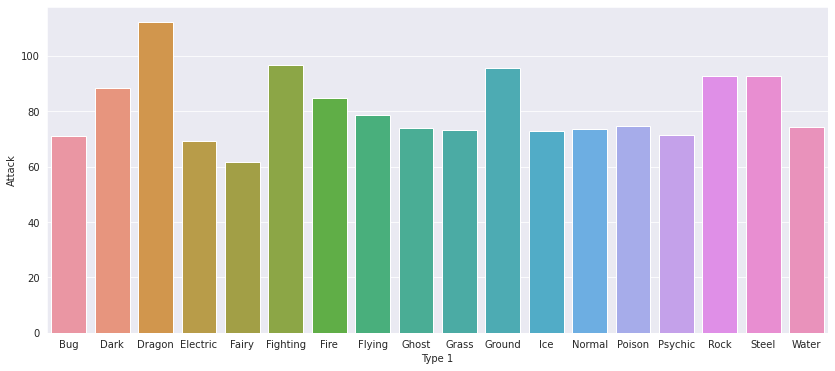

In [24]:
#x = res.columns
#y = res.loc['Attack']
sns.barplot(x = res.columns, y = res.loc['Attack'] )
plt.show()

# 其他課題--DataFrame合併 by pandas.concat (concatenate)

### 小練習:計算不同屬性的神獸個數

In [25]:
df['Legendary']==True

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [26]:
df[df['Legendary']==True].groupby('Type 1').count()

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Dark,2,2,1,2,2,2,2,2,2,2,2,2
Dragon,12,12,12,12,12,12,12,12,12,12,12,12
Electric,4,4,3,4,4,4,4,4,4,4,4,4
Fairy,1,1,0,1,1,1,1,1,1,1,1,1
Fire,5,5,4,5,5,5,5,5,5,5,5,5
Flying,2,2,0,2,2,2,2,2,2,2,2,2
Ghost,2,2,2,2,2,2,2,2,2,2,2,2
Grass,3,3,2,3,3,3,3,3,3,3,3,3
Ground,4,4,3,4,4,4,4,4,4,4,4,4


In [27]:
df[df['Legendary']==True].groupby('Type 1').count()

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Dark,2,2,1,2,2,2,2,2,2,2,2,2
Dragon,12,12,12,12,12,12,12,12,12,12,12,12
Electric,4,4,3,4,4,4,4,4,4,4,4,4
Fairy,1,1,0,1,1,1,1,1,1,1,1,1
Fire,5,5,4,5,5,5,5,5,5,5,5,5
Flying,2,2,0,2,2,2,2,2,2,2,2,2
Ghost,2,2,2,2,2,2,2,2,2,2,2,2
Grass,3,3,2,3,3,3,3,3,3,3,3,3
Ground,4,4,3,4,4,4,4,4,4,4,4,4


In [28]:
b = df[df['Legendary']==True].groupby('Type 1').count()['#']
b.index

Index(['Dark', 'Dragon', 'Electric', 'Fairy', 'Fire', 'Flying', 'Ghost',
       'Grass', 'Ground', 'Ice', 'Normal', 'Psychic', 'Rock', 'Steel',
       'Water'],
      dtype='object', name='Type 1')

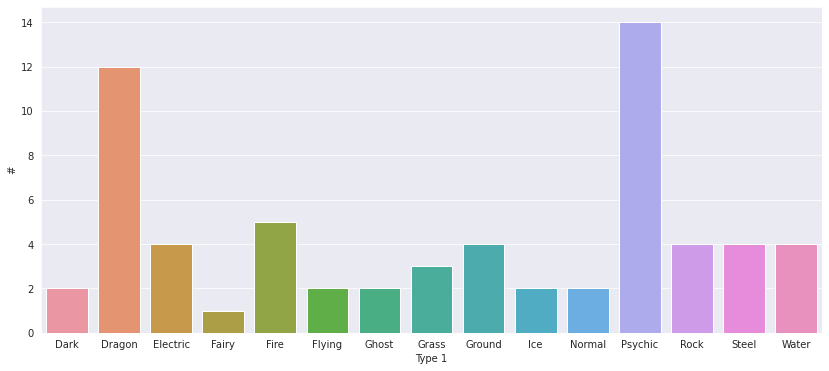

In [29]:
sns.barplot(x = b.index , y = b)
plt.show()

### 這樣忽略了第二屬性-該如何解決呢?

In [30]:
a_1=df[df['Legendary']==True].groupby('Type 1').count()
a_1

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Dark,2,2,1,2,2,2,2,2,2,2,2,2
Dragon,12,12,12,12,12,12,12,12,12,12,12,12
Electric,4,4,3,4,4,4,4,4,4,4,4,4
Fairy,1,1,0,1,1,1,1,1,1,1,1,1
Fire,5,5,4,5,5,5,5,5,5,5,5,5
Flying,2,2,0,2,2,2,2,2,2,2,2,2
Ghost,2,2,2,2,2,2,2,2,2,2,2,2
Grass,3,3,2,3,3,3,3,3,3,3,3,3
Ground,4,4,3,4,4,4,4,4,4,4,4,4


In [31]:
a_2=df[df['Legendary']==True].groupby('Type 2').count()
a_2

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,,,,
Dark,1,1,1,1,1,1,1,1,1,1,1,1
Dragon,4,4,4,4,4,4,4,4,4,4,4,4
Electric,1,1,1,1,1,1,1,1,1,1,1,1
Fairy,2,2,2,2,2,2,2,2,2,2,2,2
Fighting,4,4,4,4,4,4,4,4,4,4,4,4
Fire,3,3,3,3,3,3,3,3,3,3,3,3
Flying,13,13,13,13,13,13,13,13,13,13,13,13
Ghost,1,1,1,1,1,1,1,1,1,1,1,1
Ground,1,1,1,1,1,1,1,1,1,1,1,1


In [32]:
a_1+a_2

,#,Attack,Defense,Generation,HP,Legendary,Name,Sp. Atk,Sp. Def,Speed,Total,Type 1,Type 2
Dark,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Dragon,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN
Electric,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
Fairy,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Fighting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,NaN
Flying,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,NaN,NaN
Ghost,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Grass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ground,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN


### 直接相加出現缺值，怎麼辦呢

### 我們先合併兩個dataframe 形成新的一個dataframe

透過concat (concatenate) 函數，我們可以根據index也就是寶可夢的屬性來自動合併表格

In [33]:
df1 = pd.concat([a_1,a_2], axis=1)
df1['HP']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,HP,HP
Dark,2.0,1.0
Dragon,12.0,4.0
Electric,4.0,1.0
Fairy,1.0,2.0
Fighting,NaN,4.0
Fire,5.0,3.0
Flying,2.0,13.0
Ghost,2.0,1.0
Grass,3.0,NaN
Ground,4.0,1.0


In [34]:
df1 = df1['#'].fillna(0)
df1

,#,#
Dark,2.0,1.0
Dragon,12.0,4.0
Electric,4.0,1.0
Fairy,1.0,2.0
Fighting,0.0,4.0
Fire,5.0,3.0
Flying,2.0,13.0
Ghost,2.0,1.0
Grass,3.0,0.0
Ground,4.0,1.0


In [35]:
df1.sum(axis=1)

Dark         3.0
Dragon      16.0
Electric     5.0
Fairy        3.0
Fighting     4.0
Fire         8.0
Flying      15.0
Ghost        3.0
Grass        3.0
Ground       5.0
Ice          5.0
Normal       2.0
Psychic     19.0
Rock         4.0
Steel        5.0
Water        5.0
dtype: float64

In [36]:
df1.sum(axis=1)

Dark         3.0
Dragon      16.0
Electric     5.0
Fairy        3.0
Fighting     4.0
Fire         8.0
Flying      15.0
Ghost        3.0
Grass        3.0
Ground       5.0
Ice          5.0
Normal       2.0
Psychic     19.0
Rock         4.0
Steel        5.0
Water        5.0
dtype: float64

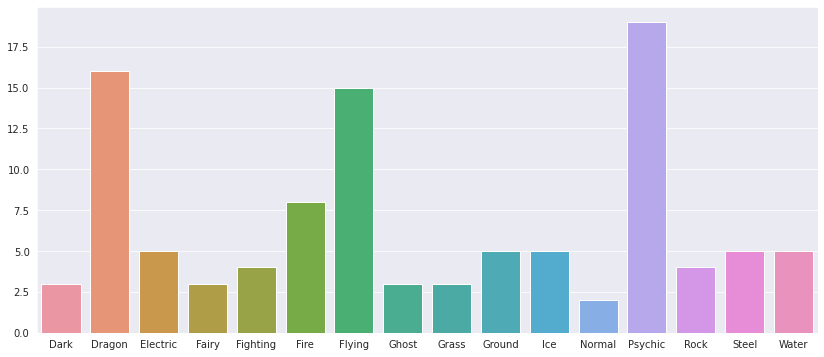

In [37]:
# x = df1.sum(axis=1).index
# y = df1.sum(axis=1)
sns.barplot(x=df1.sum(axis=1).index, y=df1.sum(axis=1))

### 小練習:請找出總共有幾隻龍系的神獸寶可夢

In [38]:
df[df['Legendary']==True][df['Type 1']=='Dragon']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


### 小練習:請畫出龍系神獸寶可夢的"速度"能力值分布圖

In [39]:
df_dragon = df[df['Legendary']==True][df['Type 1']=='Dragon']
df_dragon['Speed']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


417    110
418    110
419    110
420    110
425     95
426    115
706     90
707     90
710     95
711     95
712     95
794     95
Name: Speed, dtype: int64

In [40]:
df_dragon['Speed']

417    110
418    110
419    110
420    110
425     95
426    115
706     90
707     90
710     95
711     95
712     95
794     95
Name: Speed, dtype: int64

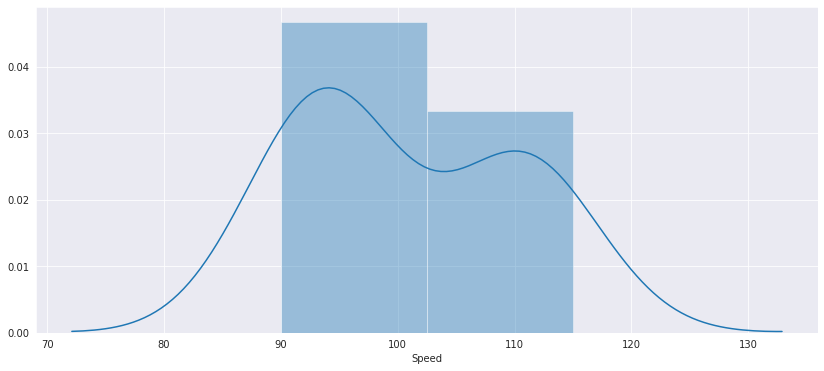

In [41]:
sns.distplot(df_dragon['Speed'])

#### Concat的學習資源

https://blog.csdn.net/stevenkwong/article/details/52528616

https://www.itread01.com/content/1545045061.html

http://studyai.com/article/ddad8af8

# 下一步 - 開始系統性的學習Matplotlib以及Seaborn

# 基本設定-主題

set_style( )是用來設置主題的，Seaborn有五個預設好的主題：darkgrid , whitegrid , dark , white,和ticks 默認：darkgrid

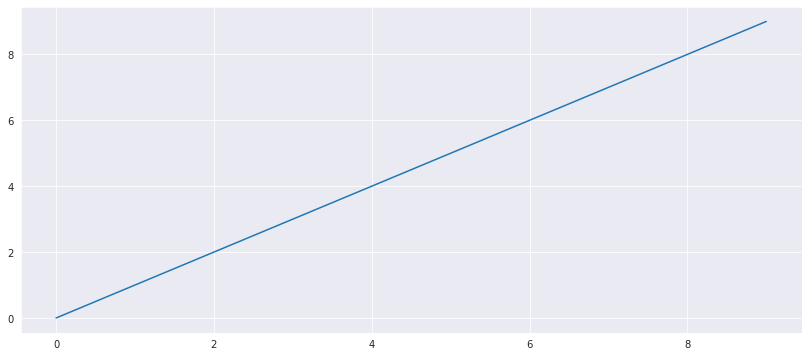

In [42]:
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.set_style("darkgrid")  
plt.plot(range(10))  

#plt.show()

# 多張圖

### 分割畫布

In [0]:
# plt.subplots?

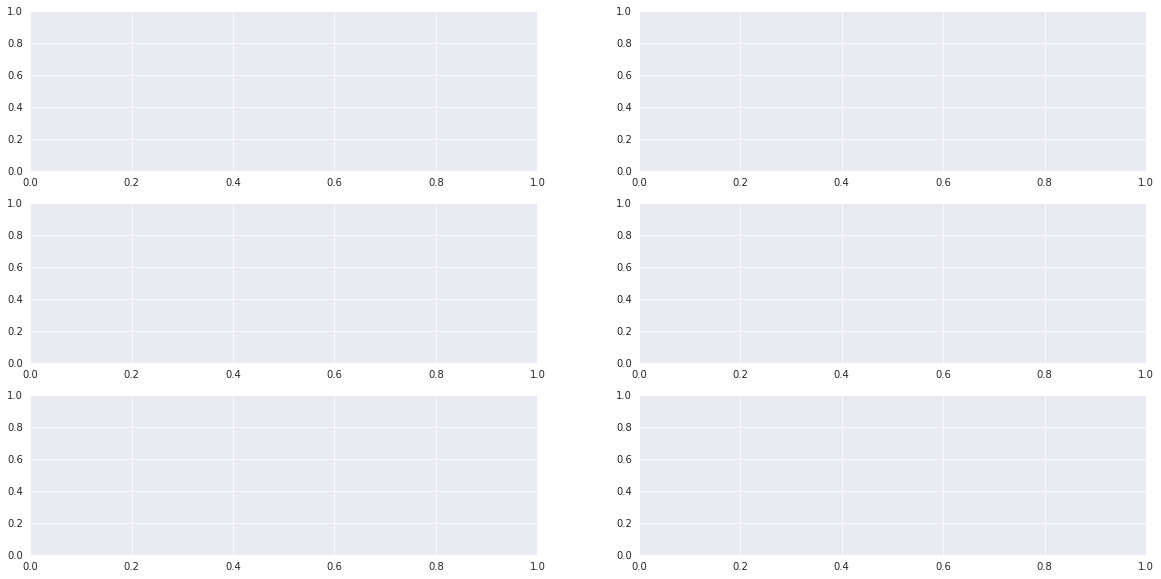

In [43]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
plt.show()

## 改變畫布Size

In [0]:
plt.subplots?

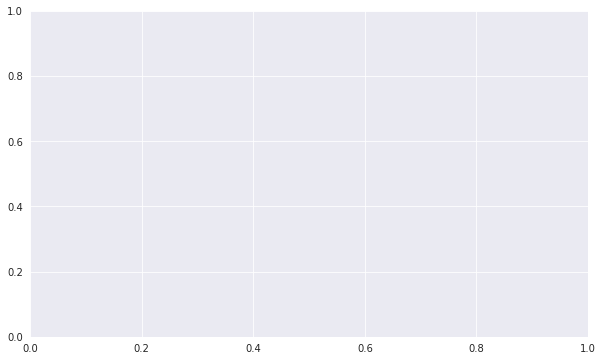

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.show()

### 加入圖

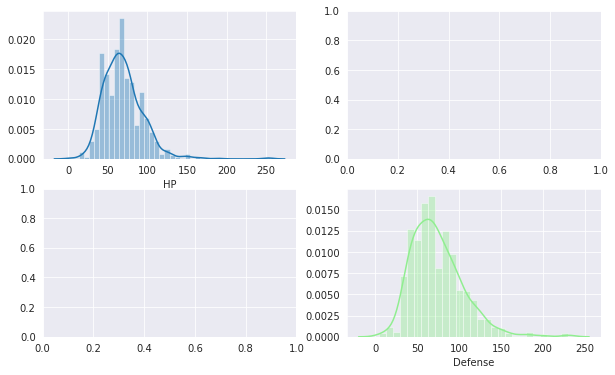

In [46]:
fig, ax = plt.subplots(2,2, figsize=(10, 6))

sns.distplot(df['HP'] , ax=ax[0,0])
sns.distplot(df['Defense'] , ax=ax[1,1], color='lightgreen')


plt.show()

### 小練習:畫出一張$2 \times 2 $的畫布，左上是HP，右上是攻擊，左下是速度，右下是防禦各自的分配圖，並為各自加上顏色

[100 Calling a color with seaborn](https://python-graph-gallery.com/100-calling-a-color-with-seaborn/)

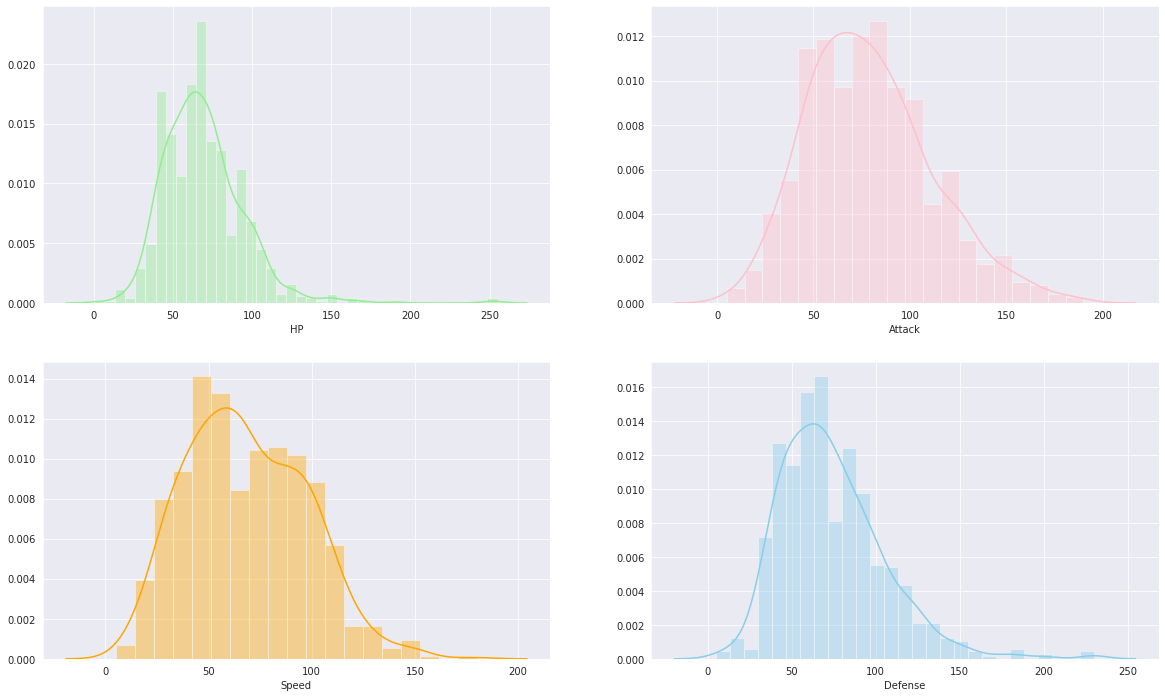

In [47]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))
sns.set_style("darkgrid")  

sns.distplot(df['HP'] , ax=ax[0,0], color='lightgreen')

sns.distplot(df['Attack'] , ax=ax[0,1], color='pink')

sns.distplot(df['Speed'] , ax=ax[1,0], color='orange')

sns.distplot(df['Defense'] , ax=ax[1,1], color='skyblue')

plt.show()

### 那可以把不同的資料畫在同一張圖上嗎

In [0]:
# plt.subplots?

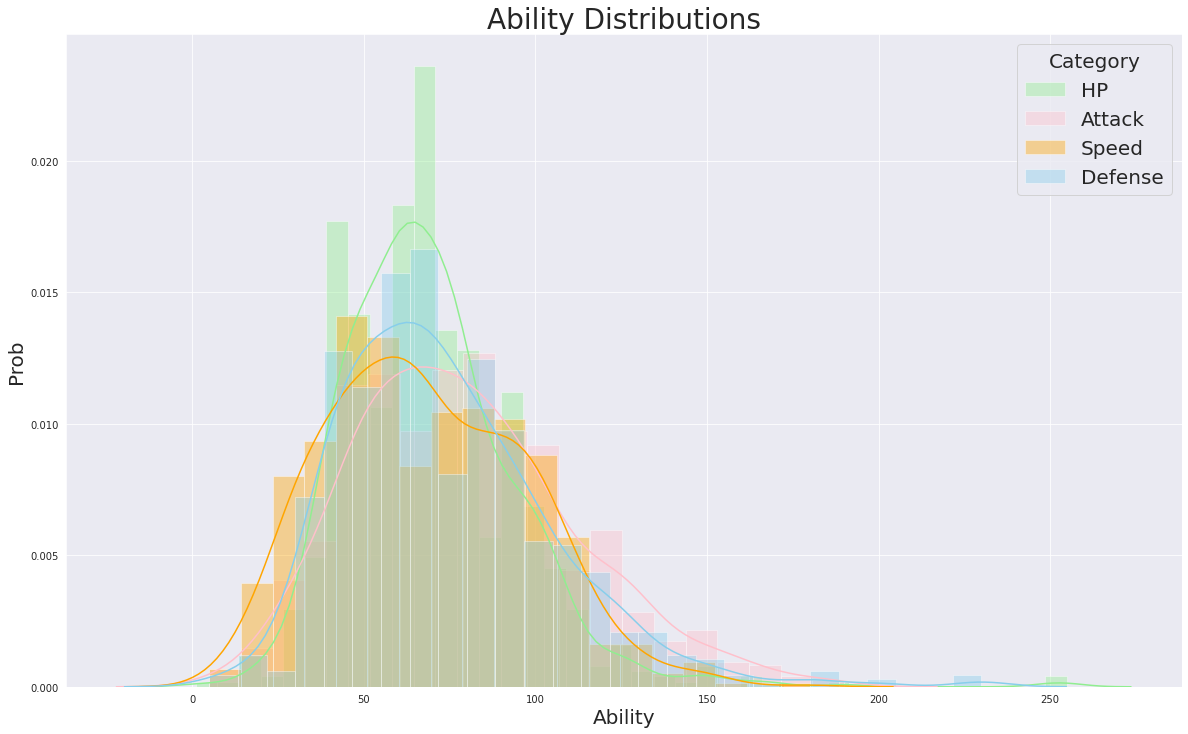

In [49]:
#定義畫布
fig, axe = plt.subplots(figsize=(20, 12))
sns.set_style("darkgrid")  
#建立圖表
sns.distplot(df['HP'] , ax=axe, color='lightgreen')
sns.distplot(df['Attack'] , ax=axe, color='pink')
sns.distplot(df['Speed'] , ax=axe, color='orange')
sns.distplot(df['Defense'] , ax=axe, color='skyblue')
#設定圖表
axe.legend(labels=['HP', 'Attack', 'Speed', 'Defense'] , fontsize=20, title='Category', title_fontsize=20)  #增加圖例 legend
axe.set_xlabel('Ability', fontsize=20)     #增加x軸的標題
axe.set_ylabel('Prob', fontsize=20)       #增加x軸的標題
#展示圖表
plt.title('Ability Distributions', fontsize=28)
plt.show()

In [0]:
# sns.distplot?

建議大家記住這個先定義畫布、主題，再加上圖表，最後show出的流程。之後再學習其他圖就只是增加新技能，比較不會混淆

### 小練習:畫出兩張圖，分別是HP以及攻擊力的能力值分布圖，並且有各自的X, Y軸標題

In [0]:
#dir(fig)

小提示:如果是在有2列以上的時候，ax會需要使用ax [0, 1] 此種二維表示表示，但如果只有一列，那麼只需使用ax[0]這種方式

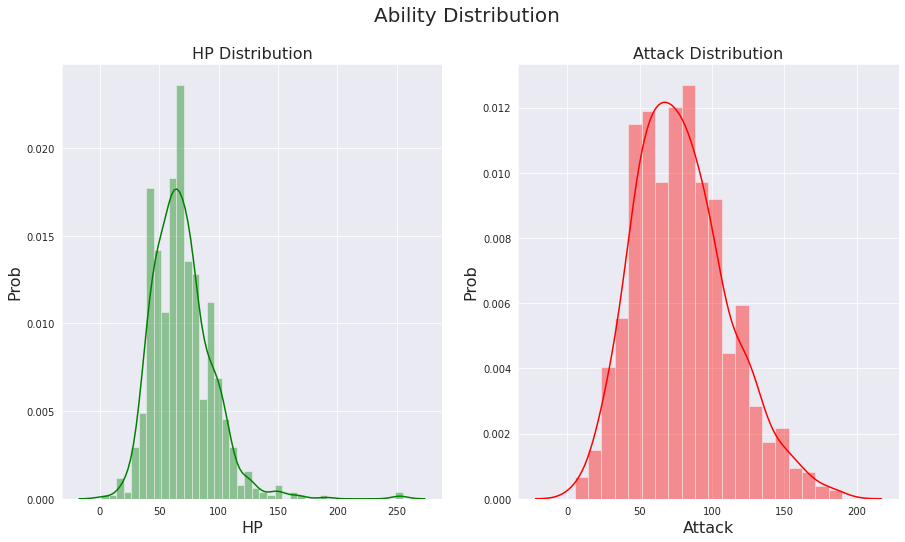

In [52]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.set_style("darkgrid")  

sns.distplot(df['HP'] , ax=ax[0], color='g')
sns.distplot(df['Attack'] , ax=ax[1], color='r')

ax[0].set_xlabel('HP', fontsize=16)     #增加x軸的標題
ax[0].set_ylabel('Prob', fontsize=16) 
ax[1].set_xlabel('Attack', fontsize=16)     #增加x軸的標題
ax[1].set_ylabel('Prob', fontsize=16)       #增加x軸的標題

ax[0].set_title('HP Distribution', fontsize=16)
ax[1].set_title('Attack Distribution', fontsize=16)

fig.suptitle('Ability Distribution', fontsize=20)  #主標題

plt.show()

# 共用X軸

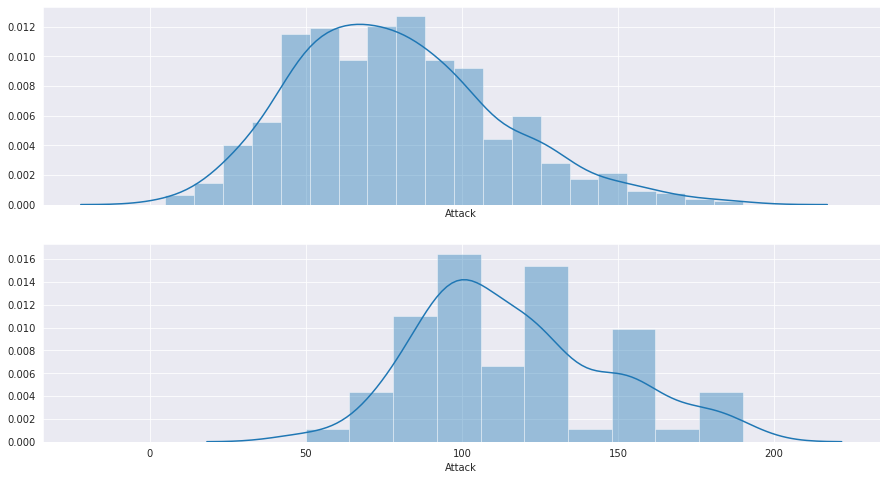

In [53]:
fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
sns.set_style("darkgrid")  

sns.distplot(df['Attack'] , ax=ax[0])

sns.distplot(df['Attack'][df['Legendary']==True],  ax=ax[1])
plt.show()

# 附錄:中文字無法顯示解決方法-改字體

[參考資料-行銷資料科學(Medium)
](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)

照著文內方法操作，再重新啟動(Kernel->Restart)，即可成功顯示中文字

# 附錄:Matplotlib其他ax物件相關方法

[Documents-matplotlib.axes](https://matplotlib.org/api/axes_api.html)